In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
weekOneTracking = pd.read_csv("tracking_week_1.csv")

In [52]:
weekOneTracking

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104695,2022090800,3696,NaN,football,171,AFTER_SNAP,2022-09-09 03:07:37.7,NaN,football,left,1.70,0.62,14.42,5.36,1.47,NaN,NaN,pass_outcome_incomplete
7104696,2022090800,3696,NaN,football,172,AFTER_SNAP,2022-09-09 03:07:37.8,NaN,football,left,0.59,0.01,3.60,0.06,1.27,NaN,NaN,NaN
7104697,2022090800,3696,NaN,football,173,AFTER_SNAP,2022-09-09 03:07:37.9,NaN,football,left,0.23,-0.07,3.60,0.23,0.38,NaN,NaN,NaN
7104698,2022090800,3696,NaN,football,174,AFTER_SNAP,2022-09-09 03:07:38,NaN,football,left,-0.13,-0.17,3.63,0.06,0.37,NaN,NaN,NaN


In [53]:
players = pd.read_csv("players.csv")

In [59]:
weekOneTracking = pd.merge(
    weekOneTracking,
    players[['nflId','position']],
    how = "left",
    left_on=['nflId'],
    right_on=['nflId']
)

In [60]:
samplePlay = weekOneTracking[(weekOneTracking['gameId']==2022091101)&(weekOneTracking['playId']==1492)&(weekOneTracking['displayName']!="football")&(weekOneTracking['frameId']==159)]

In [61]:
samplePlayPoints = samplePlay[['nflId','x','y','club','position']]

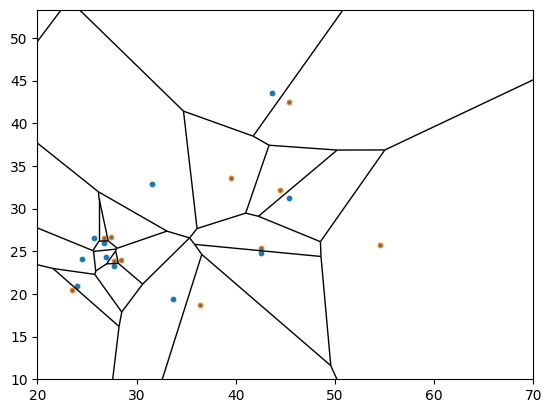

In [62]:
points = samplePlayPoints[['x','y']]

x_min, x_max = 0,100
y_min, y_max = 0, 53.3
boundary_points = np.array([
    [x_min, y_min],
    [x_min, y_max],
    [x_max, y_min],
    [x_max, y_max]
])

# Combine the original points with boundary points
all_points = np.vstack([points, boundary_points])

# Generate the Voronoi diagram
vor = Voronoi(all_points)

# Plot the Voronoi diagram with constrained boundaries
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, point_size=2)

# Plot points with different colors for each club
clubs = samplePlayPoints['club'].unique()
for club in clubs:
    club_points = samplePlayPoints[samplePlayPoints['club'] == club]
    ax.scatter(club_points['x'], club_points['y'], label=club, s=10)

# Set y-axis limits to 0 and 53.3
plt.ylim(10, 53.3)
plt.xlim(20,70)
plt.show()

In [50]:
def polygon_area(vertices):
    return 0.5 * np.abs(np.dot(vertices[:, 0], np.roll(vertices[:, 1], 1)) - np.dot(vertices[:, 1], np.roll(vertices[:, 0], 1)))

In [64]:
y_min, y_max = 0, 53.3
areas = {}
for i, region_index in enumerate(vor.point_region):
    vertices = vor.regions[region_index]
    if -1 not in vertices:  # Exclude regions that extend to infinity
        polygon = vor.vertices[vertices]
        polygon[:, 1] = np.clip(polygon[:, 1], y_min, y_max)
        area = polygon_area(polygon)
        nflId = samplePlayPoints.iloc[i]['nflId']
        position = samplePlayPoints.iloc[i]['position']
        areas[nflId] = (area, position)

# Print area and position for each nflId
for nflId, (area, position) in areas.items():
    print(f"NFL ID {nflId} (Position: {position}): Voronoi Area = {area:.2f}")

NFL ID 41264.0 (Position: G): Voronoi Area = 1.93
NFL ID 42347.0 (Position: WR): Voronoi Area = 345.74
NFL ID 42368.0 (Position: ILB): Voronoi Area = 75.34
NFL ID 43380.0 (Position: QB): Voronoi Area = 116.51
NFL ID 44841.0 (Position: TE): Voronoi Area = 96.95
NFL ID 44870.0 (Position: C): Voronoi Area = 3.24
NFL ID 44898.0 (Position: RB): Voronoi Area = 282.48
NFL ID 45004.0 (Position: FS): Voronoi Area = 987.92
NFL ID 46124.0 (Position: CB): Voronoi Area = 39.06
NFL ID 46205.0 (Position: OLB): Voronoi Area = 20.85
NFL ID 46235.0 (Position: G): Voronoi Area = 14.45
NFL ID 46527.0 (Position: ILB): Voronoi Area = 2.37
NFL ID 47799.0 (Position: OLB): Voronoi Area = 362.55
NFL ID 52415.0 (Position: DT): Voronoi Area = 0.87
NFL ID 52417.0 (Position: CB): Voronoi Area = 34.42
NFL ID 52418.0 (Position: T): Voronoi Area = 156.94
NFL ID 52446.0 (Position: OLB): Voronoi Area = 23.31
NFL ID 52472.0 (Position: FS): Voronoi Area = 410.99
NFL ID 52595.0 (Position: WR): Voronoi Area = 83.72
NFL ID 5